# Dependencies

In [ ]:
import os
import keras_cv
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import drive

# Setup

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


## Clone [Git repository](https://github.com/dimitreOliveira/stable-diffusion-textual-inversion-app)

In [ ]:
!git clone https://github.com/dimitreOliveira/stable-diffusion-textual-inversion-app

fatal: destination path 'stable-diffusion-textual-inversion-app' already exists and is not an empty directory.


## Update directory

In [ ]:
os.chdir('stable-diffusion-textual-inversion-app')

## Install requirements

In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Configs

In [ ]:
%%file params.yaml 
model:
  models_dir: "models/example"
  models_version: 1
  token: "<token>"
  initializer_token: "canary"
  max_prompt_length: 77
  export: "True"

train:
  epochs: 50

dataset:
  group_datasets_dir: "datasets/group/"
  single_datasets_dir: "datasets/single/"
  single_urls: [
    "https://i.superesportes.com.br/y6h6AuNP3_RqLhRMT8pTAYHohUI=/1200x900/smart/imgsapp.mg.superesportes.com.br/app/noticia_126420360808/2022/11/24/3980867/canarinho-pistola-mascote-da-selecao-brasileira_1_34424.jpg",
    "https://conteudo.imguol.com.br/c/copadomundo/2018/Imagem/d1/2018/06/18/canarinho-em-frente-a-arena-rostov-palco-de-brasil-x-suica-na-copa-da-russia-1529337563266_v2_4x3.jpg",
    "https://s2.glbimg.com/d-MSOO9iQCpWZCHhxL2KcoRwiXU=/0x0:1200x800/984x0/smart/filters:strip_icc()/s.glbimg.com/es/ge/f/original/2018/10/12/canarinho2.jpg",
    "https://www.tribunapr.com.br/wp-content/uploads/sites/1/2018/06/canarinho-pistola-24062018064941211.jpeg",
    "http://conteudo.imguol.com.br/c/esporte/03/2018/10/10/canarinho-pistola-1539225072537_v2_1920x1278.jpg",
    "https://www.tnh1.com.br//fileadmin/_processed_/b/b/csm_mascote-canarinho-reproducao-CBF_facc71b84e.jpg",
    "https://static-wp-tor15-prd.torcedores.com/wp-content/uploads/2018/10/Canarinho-Pistola-590x393.jpg",
    "https://extra.globo.com/incoming/25611664-5cc-355/w976h550-PROP/45315813722_4a14ff02c3_o.jpg",
    "https://media.gazetadopovo.com.br/2018/06/9095b7c023e2f8532a217d16e9c3332b-gpLarge.jpg",
    "https://cdn.resfu.com/media/img_news/mascote-da-selecao-brasileira--twitter-cbf.png",
    "https://www.netvasco.com.br/news/noticias16/arquivos/20221213-111442-1-1-.jpg",
    "https://www.dci.com.br/wp-content/uploads/2022/11/design-sem-nome-18.jpg",
    "https://i.ytimg.com/vi/PGVaYZ1KUtQ/maxresdefault.jpg",
  ]
  group_urls: [
  ]
  single_prompts: [
    "a photo of a {}",
    "a rendering of a {}",
    "a cropped photo of the {}",
    "the photo of a {}",
    "a photo of a clean {}",
    "a photo of my {}",
    "a photo of the cool {}",
    "a close-up photo of a {}",
    "a bright photo of the {}",
    "a cropped photo of a {}",
    "a photo of the {}",
    "a good photo of the {}",
    "a photo of one {}",
    "a close-up photo of the {}",
    "a rendition of the {}",
    "a photo of the clean {}",
    "a rendition of a {}",
    "a photo of a nice {}",
    "a good photo of a {}",
    "a photo of the nice {}",
    "a photo of the small {}",
    "a photo of the weird {}",
    "a photo of the large {}",
    "a photo of a cool {}",
    "a photo of a small {}",
  ]
  group_prompts: [
    "a photo of a group of {}",
    "a rendering of a group of {}",
    "a cropped photo of the group of {}",
    "the photo of a group of {}",
    "a photo of a clean group of {}",
    "a photo of my group of {}",
    "a photo of a cool group of {}",
    "a close-up photo of a group of {}",
    "a bright photo of the group of {}",
    "a cropped photo of a group of {}",
    "a photo of the group of {}",
    "a good photo of the group of {}",
    "a photo of one group of {}",
    "a close-up photo of the group of {}",
    "a rendition of the group of {}",
    "a photo of the clean group of {}",
    "a rendition of a group of {}",
    "a photo of a nice group of {}",
    "a good photo of a group of {}",
    "a photo of the nice group of {}",
    "a photo of the small group of {}",
    "a photo of the weird group of {}",
    "a photo of the large group of {}",
    "a photo of a cool group of {}",
    "a photo of a small group of {}",
  ]


Overwriting params.yaml


# Fine-tune (textual inversion)

In [ ]:
!python train.py

2023-04-02 21:54:14.276812: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-02 21:54:14.402975: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-02 21:54:15.353875: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-04-02 21:54:15.353973: W tensorflow/compiler/xla/stream_executor

In [ ]:
prompt_token = "<token>"
text_encoder_path = "./models/example/text_encoder/keras"

## Load the fine-tuned model

In [ ]:
stable_diffusion = keras_cv.models.StableDiffusion()
stable_diffusion.tokenizer.add_tokens(prompt_token)

loaded_text_encoder_ = tf.keras.models.load_model(text_encoder_path)
stable_diffusion._text_encoder = loaded_text_encoder_
stable_diffusion._text_encoder.compile(jit_compile=True)

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE


# Inference

In [ ]:
def plot_images(images: np.ndarray) -> None:
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.axis("off")

You do not have Waymo Open Dataset installed, so KerasCV Waymo metrics are not available.


## Example 1

50/50 [==============================] - 16s 313ms/step


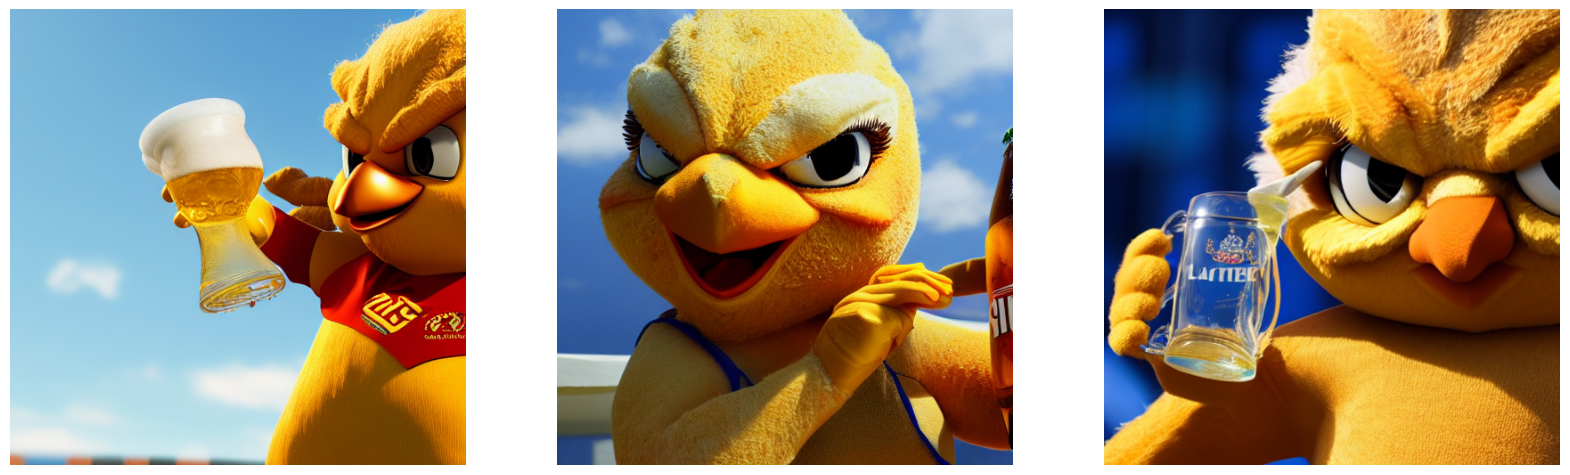

In [ ]:
generated = stable_diffusion.text_to_image(
    f"A {prompt_token} drinking beer, 4k, highly detailed, highest quality, 8k",
    batch_size=3,
)
plot_images(generated)

## Example 2

50/50 [==============================] - 16s 315ms/step


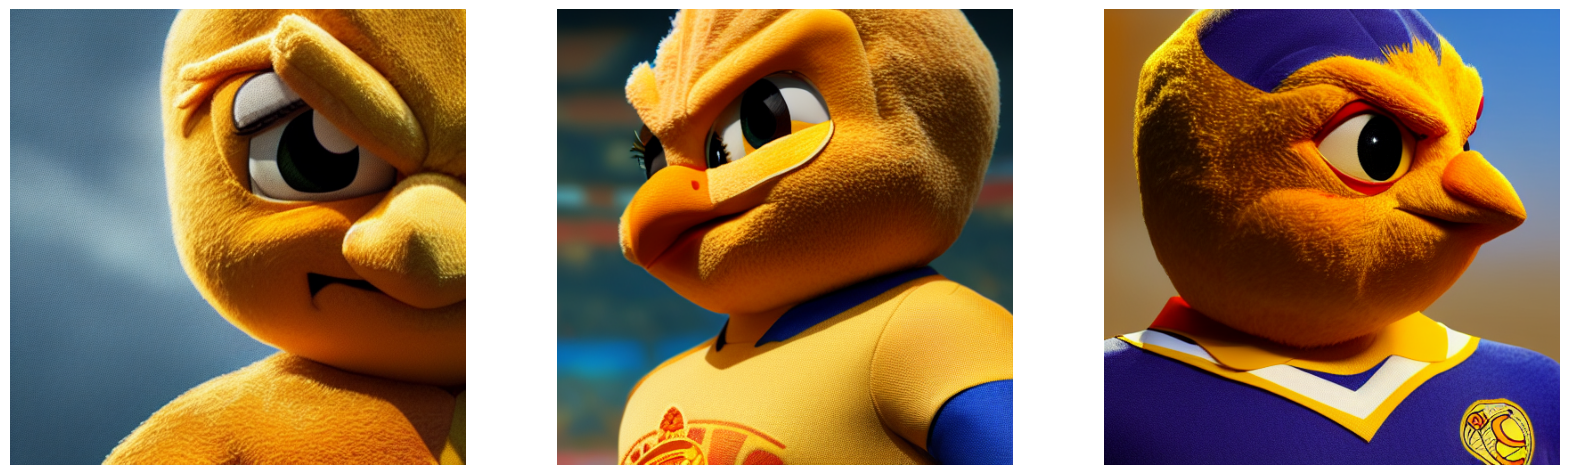

In [ ]:
generated = stable_diffusion.text_to_image(
    f"A {prompt_token} portrait, 4k, highly detailed, highest quality, 8k",
    batch_size=3,
)
plot_images(generated)

# Export model (optional)

You might want to export your model to use it again later

In [ ]:
!zip -r decoder.zip models/example/decoder/
!zip -r diffusion_model.zip models/example/diffusion_model/
!zip -r text_encoder.zip models/example/text_encoder/

  adding: models/example/decoder/ (stored 0%)
  adding: models/example/decoder/1/ (stored 0%)
  adding: models/example/decoder/1/assets/ (stored 0%)
  adding: models/example/decoder/1/fingerprint.pb (stored 0%)
  adding: models/example/decoder/1/saved_model.pb (deflated 93%)
  adding: models/example/decoder/1/variables/ (stored 0%)
  adding: models/example/decoder/1/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: models/example/decoder/1/variables/variables.index (deflated 76%)
  adding: models/example/decoder/50/ (stored 0%)
  adding: models/example/decoder/50/assets/ (stored 0%)
  adding: models/example/decoder/50/fingerprint.pb (stored 0%)
  adding: models/example/decoder/50/saved_model.pb (deflated 93%)
  adding: models/example/decoder/50/variables/ (stored 0%)
  adding: models/example/decoder/50/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: models/example/decoder/50/variables/variables.index (deflated 76%)
  adding: models/example/diffusion_model/

Here I am saving it to my Google Drive, you might want to change the output path. alternatively you could also simply download the files.

In [ ]:
!mkdir "../drive/MyDrive/Colab Notebooks/Textual inversion/models/canarinho/"

In [ ]:
!cp text_encoder.zip "../drive/MyDrive/Colab Notebooks/Textual inversion/models/canarinho/"
!cp diffusion_model.zip "../drive/MyDrive/Colab Notebooks/Textual inversion/models/canarinho/"
!cp decoder.zip "../drive/MyDrive/Colab Notebooks/Textual inversion/models/canarinho/"

In [ ]:
!ls "../drive/MyDrive/Colab Notebooks/Textual inversion/models/canarinho/"

decoder.zip  diffusion_model.zip  text_encoder.zip
